In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import dataset
spam_data = pd.read_csv('Data/spam.csv', encoding="ISO-8859-1")

In [4]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Steps 
# 1. Data Cleaning
# 2. EDA
# 3. Text Pre-processing
# 4. Model Building
# 5. Evaluating
# 6. Improving model


## 1. Data Cleaning 

In [6]:
spam_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
# Check for null values
spam_data.info()
spam_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# Drop second and the last column
spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [9]:
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# Rename columns and make them self-explanatory
spam_data = spam_data.rename(columns = {'v1':'target', 'v2' :'message'})

In [11]:
spam_data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# Use label encoder to change target text values into numeric
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(spam_data['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
spam_data['target'] = encoder.fit_transform(spam_data['target'])
spam_data

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
# Check for duplicate values
spam_data.duplicated().sum()

403

In [15]:
# Remove the duplicate values
spam_data = spam_data.drop_duplicates(keep ='first') # Keeps the first value and removes the duplicates

In [16]:
# Check for duplicate 
spam_data.duplicated().sum()

0

In [17]:
spam_data.shape

(5169, 2)

## Exploratory Data Analysis

In [18]:
# Check value counts
spam_data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

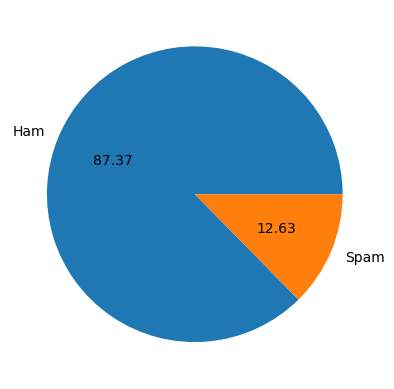

In [19]:
# Plot the data in matplotlib
plt.pie(spam_data['target'].value_counts(), labels = ['Ham', 'Spam'],autopct= '%0.2f')
plt.show()

In [20]:
# Slight difference in data

In [21]:
# Futher analysis using nltk 
!pip install nltk;

In [22]:
import nltk

In [23]:
nltk.download('punkt') # For NLTK dependencies

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mdhus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
# Check the length of each message and create a new column
spam_data['message'].apply(len)
spam_data['num_characters'] = spam_data['message'].apply(len)

C:\Users\mdhus\AppData\Local\Temp\ipykernel_19056\3109159875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['num_characters'] = spam_data['message'].apply(len)


In [25]:
spam_data

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [26]:
# Extract the number of words in the messages using nltk tokenizer
spam_data["message"].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [27]:
# Count the words and add a new column to the DataFrame
spam_data['word_count'] = spam_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))
spam_data

C:\Users\mdhus\AppData\Local\Temp\ipykernel_19056\3170460018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['word_count'] = spam_data['message'].apply(lambda x: len(nltk.word_tokenize(x)))


,target,message,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [28]:
spam_data

,target,message,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [29]:
# Tokenize data based on sentence
spam_data['sent_count'] = spam_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\mdhus\AppData\Local\Temp\ipykernel_19056\3300578500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['sent_count'] = spam_data['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [30]:
spam_data.sample(5)

,target,message,num_characters,word_count,sent_count
1843,0,Super da:)good replacement for murali,37,8,1
297,0,Hurt me... Tease me... Make me cry... But in t...,153,39,2
458,0,1.20 that call cost. Which i guess isnt bad. M...,79,22,3
1711,0,I got your back! Do you have any dislikes in bed?,49,13,2
2430,0,How was txting and driving,26,5,1


In [31]:
# describe the dataframe
spam_data[['num_characters','word_count', 'sent_count']].describe()

,num_characters,word_count,sent_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#Describe ham and spam messages
# Ham Message
spam_data[spam_data['target']== 0][['num_characters','word_count', 'sent_count']].describe()

,num_characters,word_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [33]:
# Describe for spam messages
spam_data[spam_data['target']==1][['num_characters','word_count', 'sent_count']].describe()

,num_characters,word_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [34]:
# Plot the data in histogram
!pip install seaborn


In [35]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

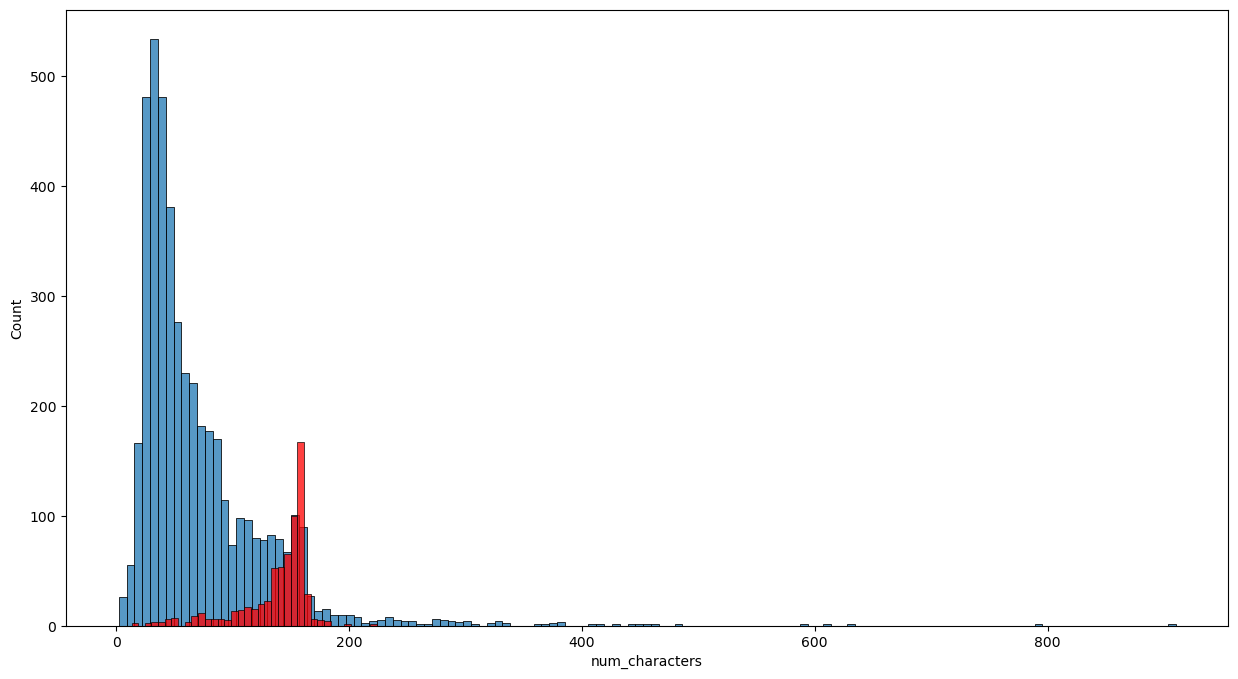

In [36]:
#Based on characters
plt.figure(figsize = (15,8))
sns.histplot(spam_data[spam_data['target']==0]['num_characters'])
sns.histplot(spam_data[spam_data['target']==1]['num_characters'], color = 'red')

<Axes: xlabel='sent_count', ylabel='Count'>

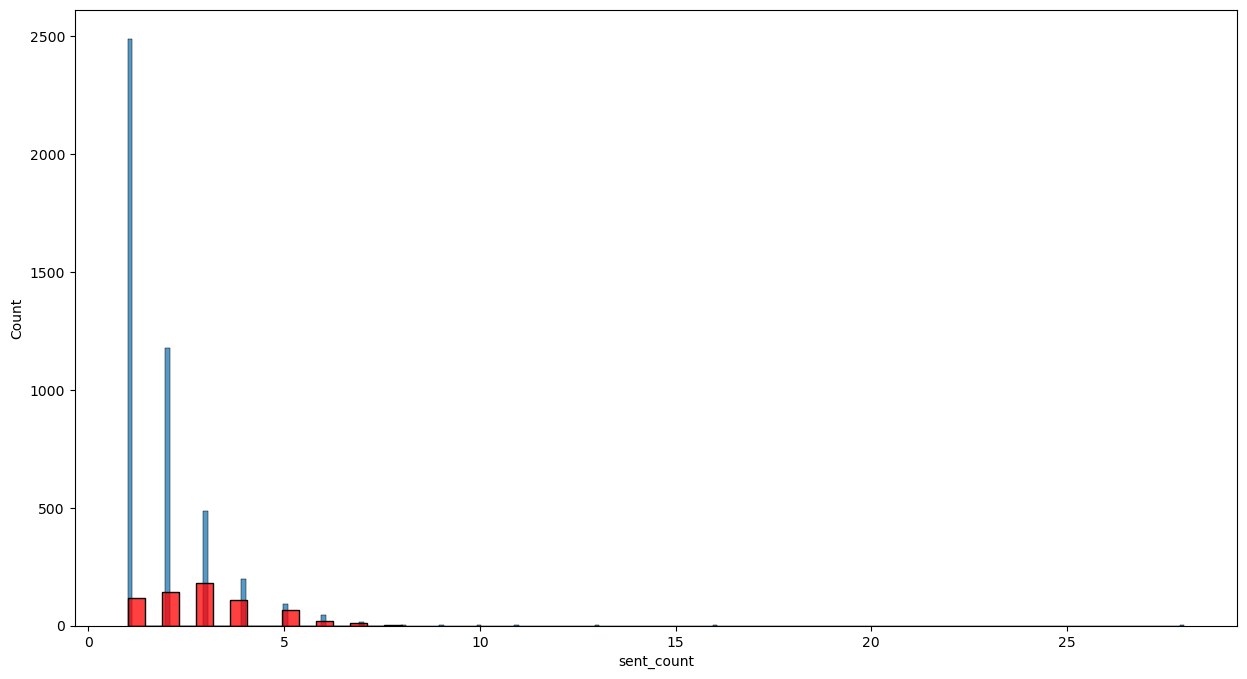

In [37]:
# Based on word count
plt.figure(figsize = (15,8))
sns.histplot(spam_data[spam_data['target']==0]['sent_count'])
sns.histplot(spam_data[spam_data['target']==1]['sent_count'], color = 'red')

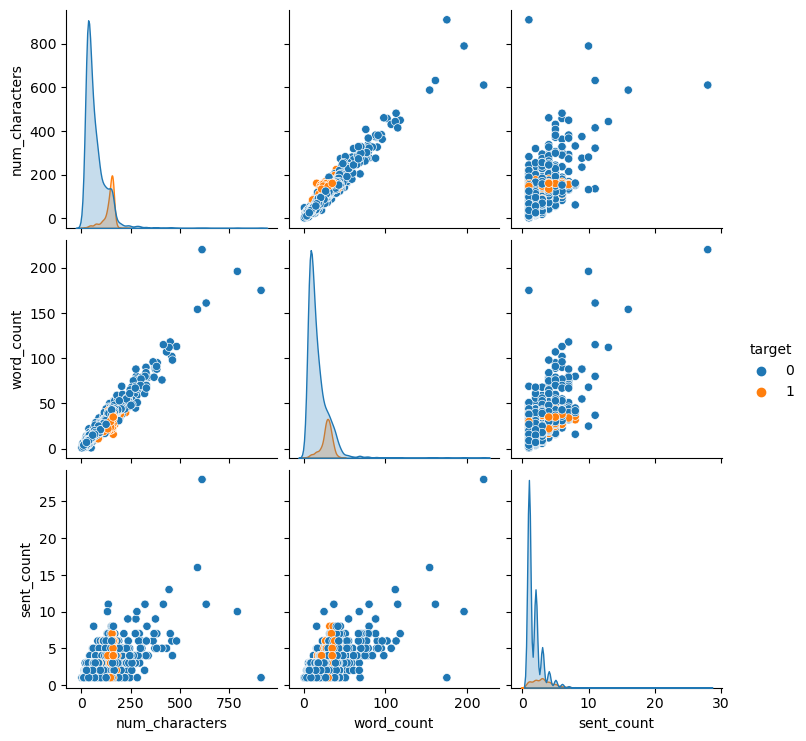

In [38]:
# Pairplot
sns.pairplot(spam_data, hue = 'target')

C:\Users\mdhus\AppData\Local\Temp\ipykernel_19056\2351702175.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spam_data.corr(), annot= True)


<Axes: >

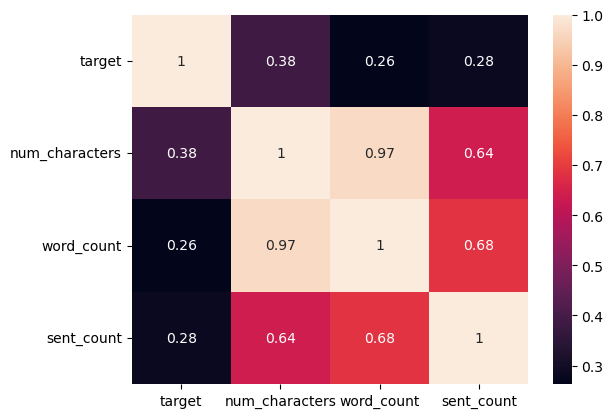

In [39]:
# Check correlation
sns.heatmap(spam_data.corr(), annot= True)

## 3. Data Pre-processing
    1. Tokenization
    2. Lower case
    3. Removing special Characters, Stop words and punctuation
    4. Stemming (lemma)

In [40]:
# 4. Stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Hello Loving')

# What are Stopwords?

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

#Strings
import string
string.punctuation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdhus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
# Create a fuction to lower the text
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    
    #Remove the alpha NUmeric values from messages
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
    

    # Remove the stopwords and punctuations
    message = y[:]  #Cloning the y list
    y.clear()
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation: # Removes the punctuations 
                                                                                #and stopwords from text
            y.append(i)
    
    # Stemming 
    
    message = y[:]
    y.clear()
    for i in message:
        y.append(ps.stem(i))
        
        
    return " " .join(y)

In [42]:
spam_data['message'].apply(transform_message) 

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: message, Length: 5169, dtype: object

In [43]:
spam_data['transformed_data'] = spam_data['message'].apply(transform_message) 

C:\Users\mdhus\AppData\Local\Temp\ipykernel_19056\3783895519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_data['transformed_data'] = spam_data['message'].apply(transform_message)


In [44]:
spam_data

,target,message,num_characters,word_count,sent_count,transformed_data
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## 4. Model Building
    1. Vectorization of the Text data
    2. Building model
    3. Training and testing data

In [45]:
# Vectorization using Bag of words and TfidfVectorizor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [46]:
X = tf.fit_transform(spam_data['transformed_data']).toarray()

In [47]:
X.shape

(5169, 6708)

In [48]:
y = spam_data['target'].values

In [49]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
#Split the data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2, random_state = 2)

In [51]:
#We will try different models and train them to obtain better results
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [52]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [53]:
# Fit the data in the GaussianNB model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GaussianNB Model: ")
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

GaussianNB Model: 
0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [54]:
#Fit the data in MultinomialNB and test

mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print("MultimonialNB Model: ")
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

MultimonialNB Model: 
0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [55]:
# Fit the data in the BernoulliNB model
bnb.fit(X_train, y_train)
y_pred2 = bnb.predict(X_test)
print("BernoulliNB model: ")
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

BernoulliNB model: 
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Tfidf with BernoulliNB produced the best results
#### In imbalanced data, precision matters more than accuracy

In [56]:
#Extract the model using pickle
import pickle
pickle.dump(mnb, open("model.pkl", 'wb'))

In [57]:
pickle.dump(tf, open("Vectorizer.pkl", 'wb'))